In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/latent_ds,G/ref_adv,G/ref_dom,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:00:56,100,500000,0.000290,0.024484,0.012281,0.004059,0.008299,0.012266,0.614320,...,0.612979,0.508922,38.152229,0.342000,0.284397,3.477843,0.019785,1.0,0.1,0.0
1,0:01:28,200,500000,0.031564,0.012103,0.042657,0.002060,0.062670,0.016214,0.442924,...,0.514093,0.606751,30.159014,0.190944,0.155289,0.986467,0.005846,1.0,0.1,0.0
2,0:01:59,300,500000,0.123490,0.002390,0.058478,0.008860,0.047192,0.022973,0.541099,...,0.450163,0.356153,17.803520,0.162943,0.132995,0.531253,0.003703,1.0,0.1,0.0
3,0:02:31,400,500000,0.113686,0.008107,0.039880,0.004286,0.105143,0.027931,0.487267,...,0.391279,0.395779,20.385218,0.115192,0.100388,0.802864,0.023242,1.0,0.1,0.0
4,0:03:02,500,500000,0.043544,0.009799,0.044747,0.010078,0.083971,0.029610,0.572438,...,0.392920,0.372872,14.472038,0.113307,0.094202,0.421500,0.004283,1.0,0.1,0.0


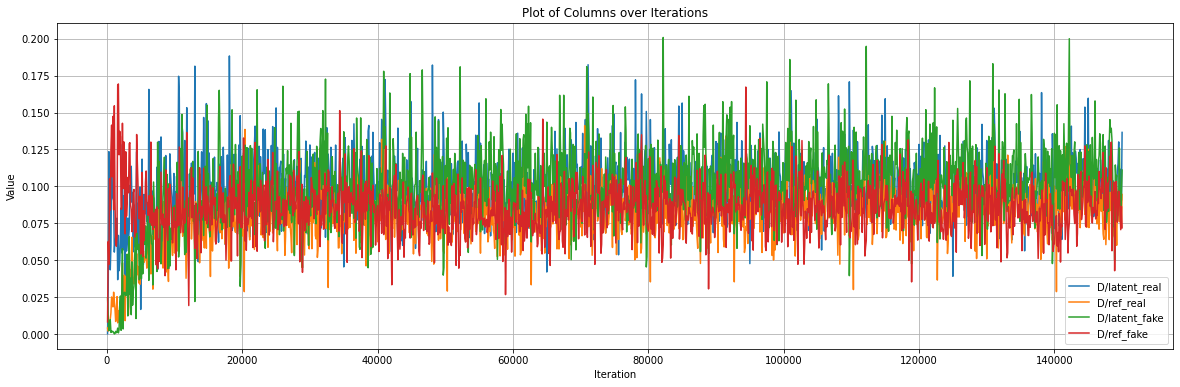

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

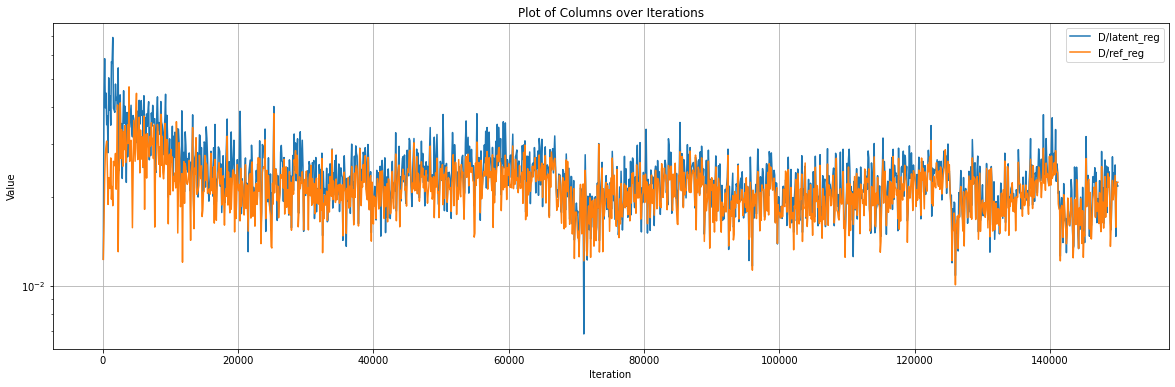

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

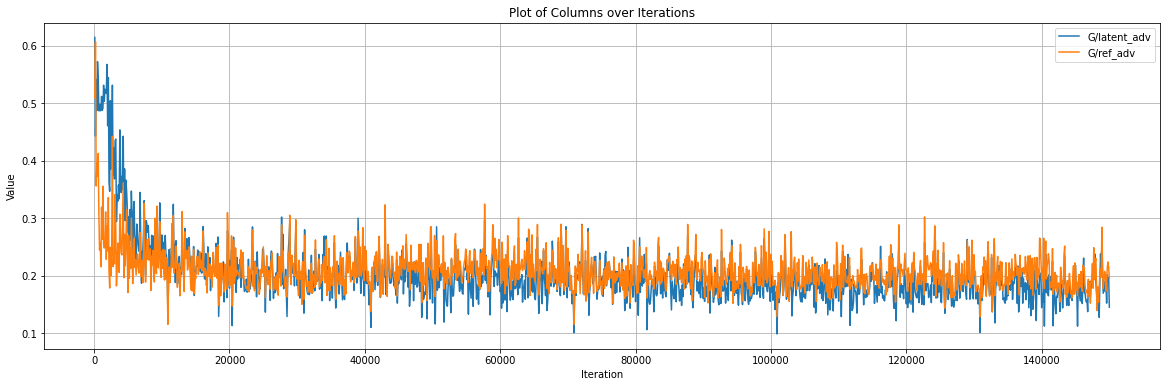

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

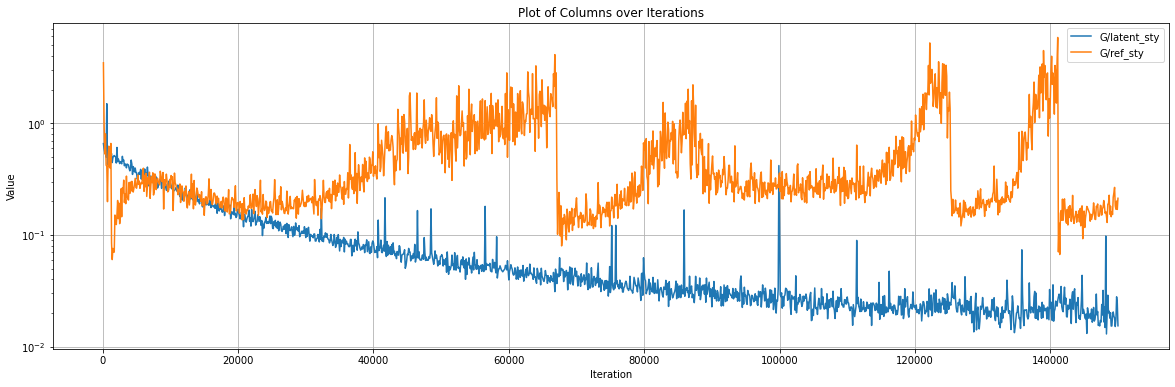

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

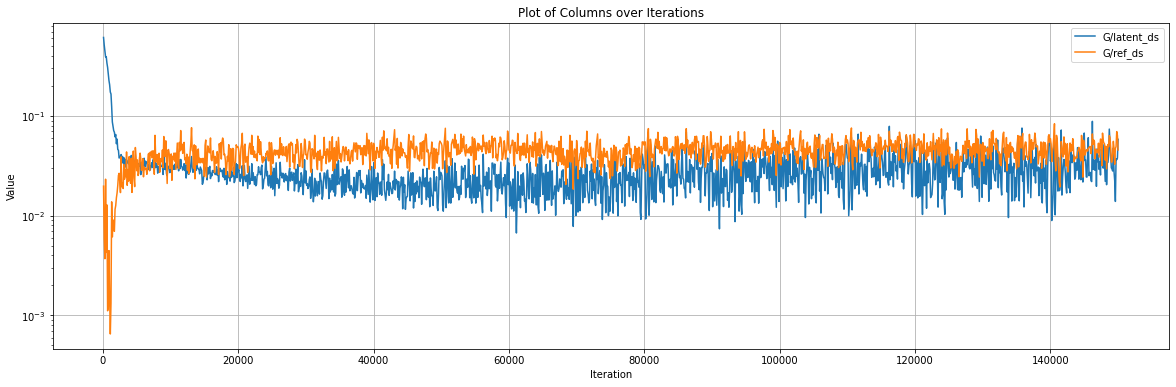

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

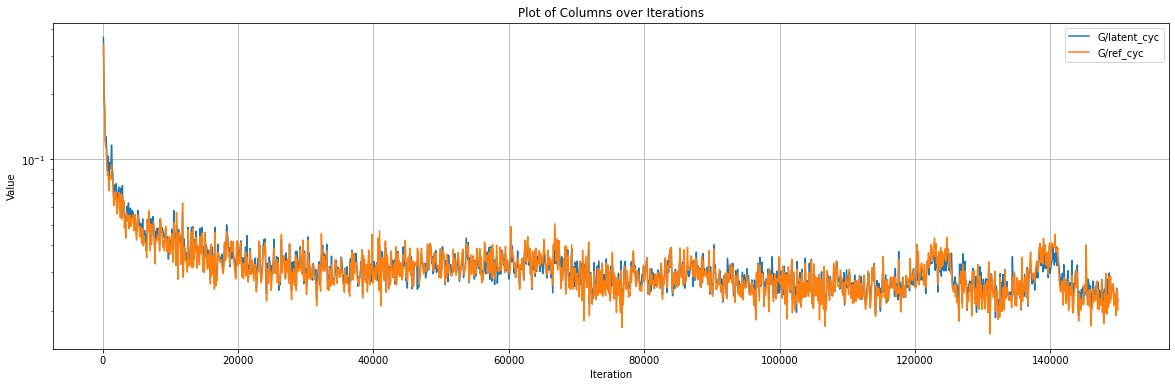

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

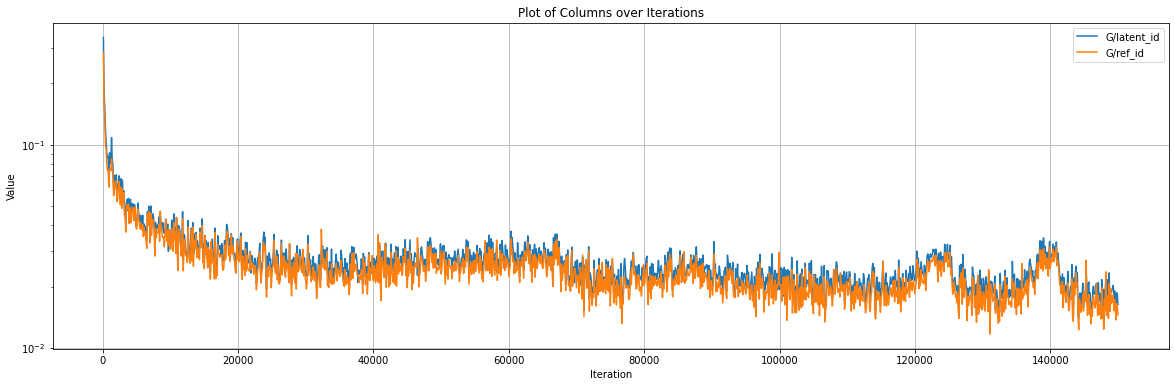

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

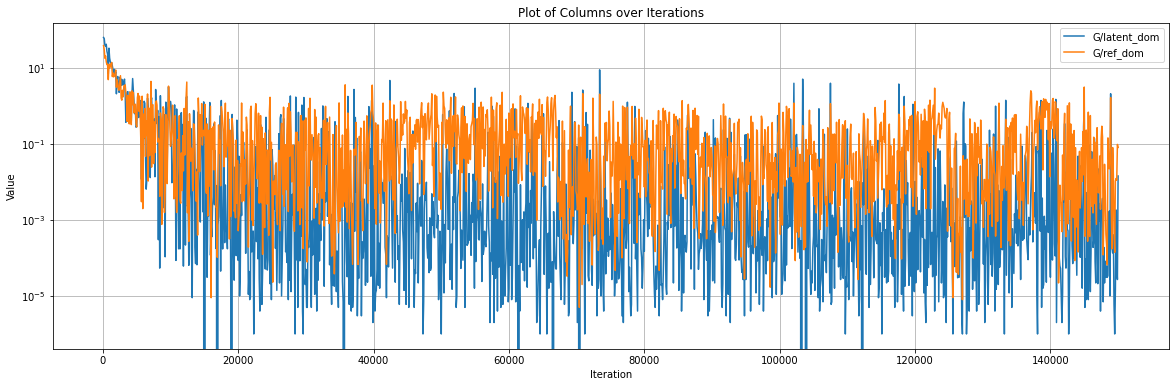

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

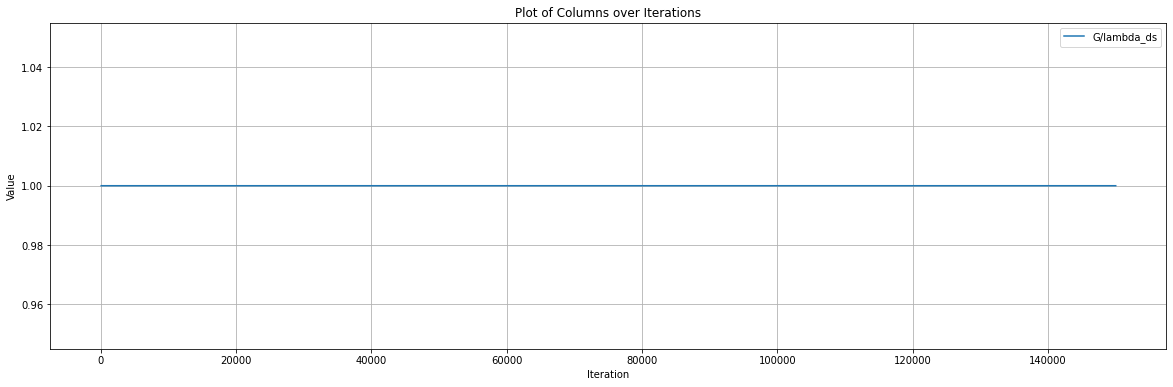

In [12]:
plot_columns(history, ['G/lambda_ds'])

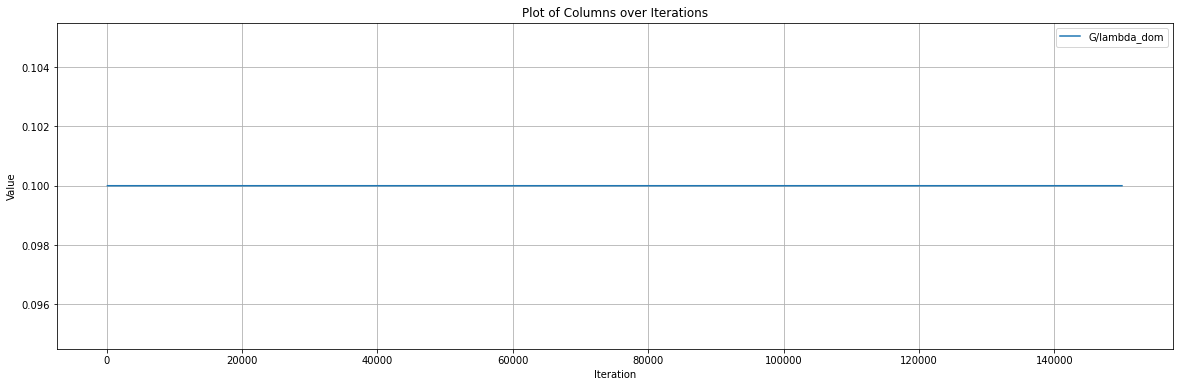

In [13]:
plot_columns(history, ['G/lambda_dom'])

# Metrics

## TSTR Score

In [14]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,domain,accuracy,loss
0,10000,latent,WAL,10,0.962418,0.134875
1,10000,latent,WAL,11,0.941480,0.182655
2,10000,latent,WAL,12,0.887348,0.367532
3,10000,latent,WAL,13,0.887147,0.331368
4,10000,latent,WAL,14,0.709122,1.220672


Maximum accuracy for CLD in latent mode: 0.8021 at step 120000
Maximum accuracy for CLU in latent mode: 0.9208 at step 100000
Maximum accuracy for RUN in latent mode: 0.6650 at step 100000
Maximum accuracy for WAL in latent mode: 0.9131 at step 90000


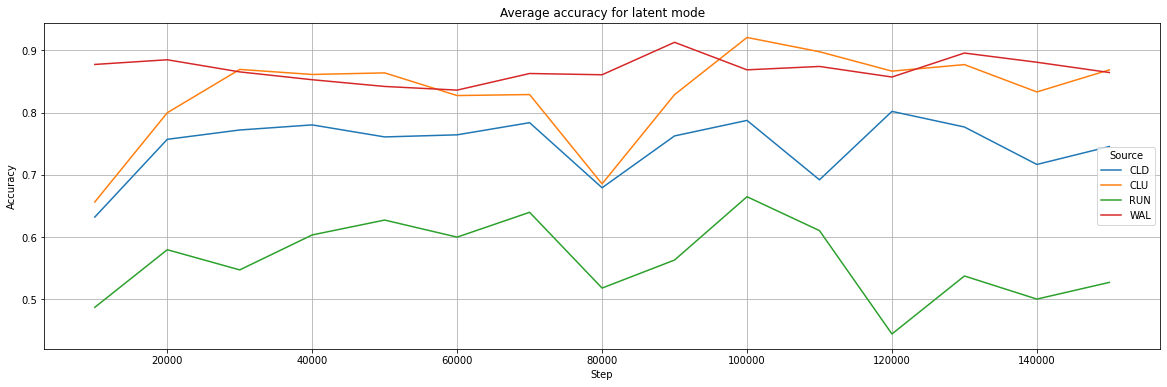

Maximum accuracy for CLD in reference mode: 0.9284 at step 110000
Maximum accuracy for CLU in reference mode: 0.9455 at step 150000
Maximum accuracy for RUN in reference mode: 0.8114 at step 120000
Maximum accuracy for WAL in reference mode: 0.9307 at step 130000


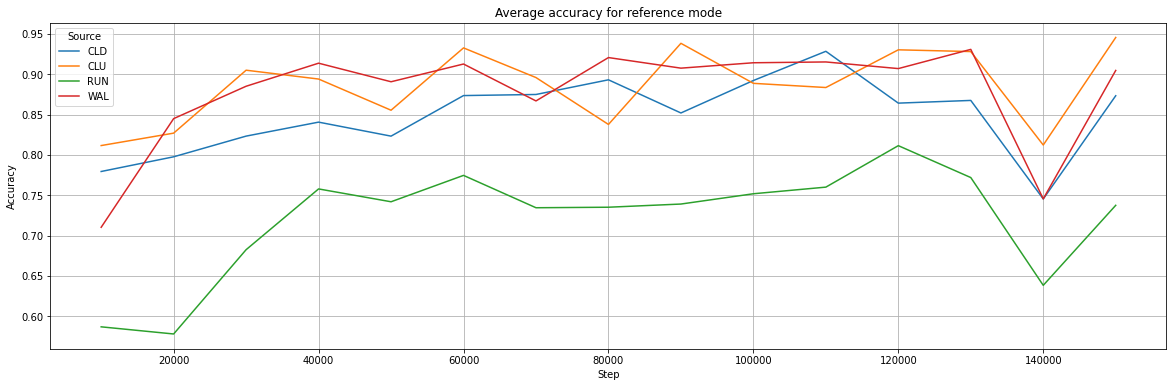

Minimum loss for CLD in latent mode: 0.9576 at step 70000
Minimum loss for CLU in latent mode: 0.4034 at step 110000
Minimum loss for RUN in latent mode: 1.2962 at step 70000
Minimum loss for WAL in latent mode: 0.4086 at step 90000


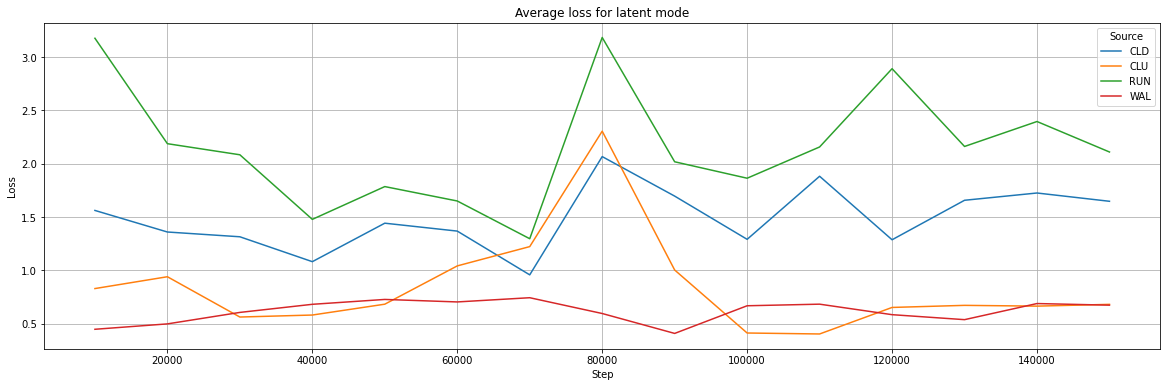

Minimum loss for CLD in reference mode: 0.3671 at step 110000
Minimum loss for CLU in reference mode: 0.2798 at step 150000
Minimum loss for RUN in reference mode: 0.6565 at step 120000
Minimum loss for WAL in reference mode: 0.2854 at step 130000


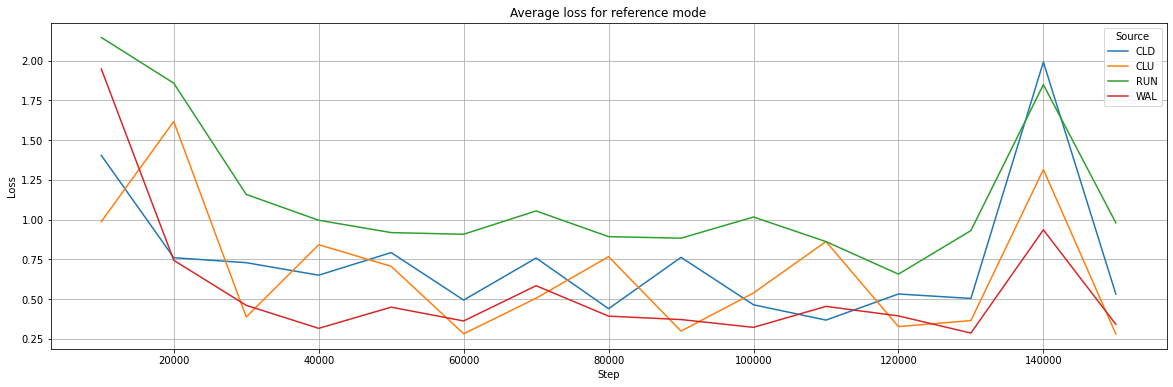

In [15]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8399 at step 100000
Maximum accuracy for CLU: 0.9072 at step 150000
Maximum accuracy for RUN: 0.7084 at step 100000
Maximum accuracy for WAL: 0.9133 at step 130000


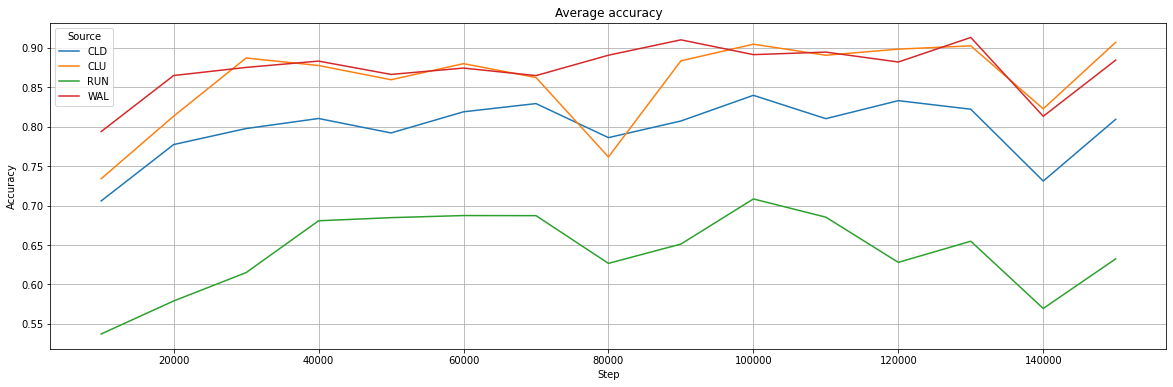

Minimum loss for CLD: 0.8576 at step 70000
Minimum loss for CLU: 0.4745 at step 30000
Minimum loss for RUN: 1.1753 at step 70000
Minimum loss for WAL: 0.3895 at step 90000


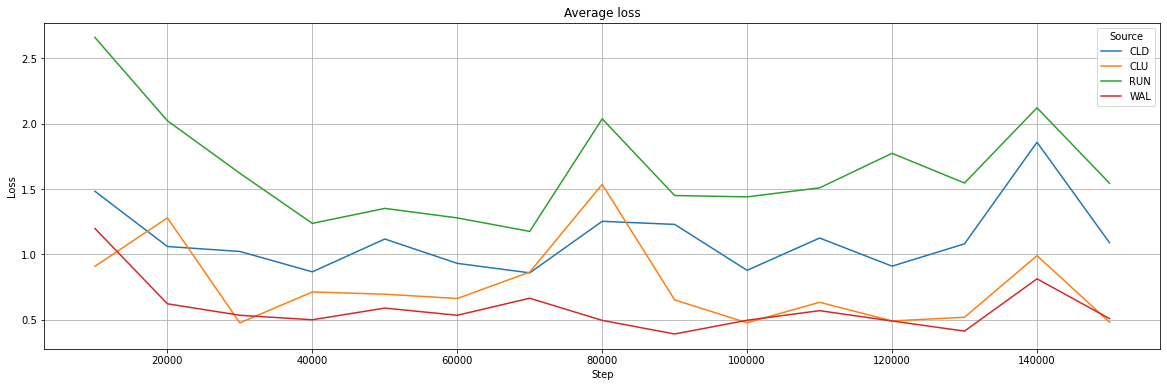

In [16]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.8106 at step 100000
Max in reference mode: 0.8782 at step 120000


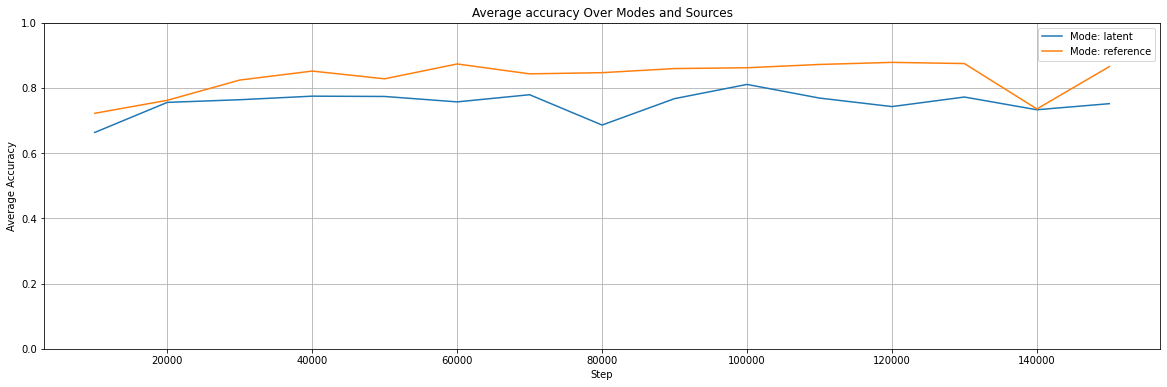

Min in latent mode: 0.9553 at step 40000
Min in reference mode: 0.4769 at step 120000


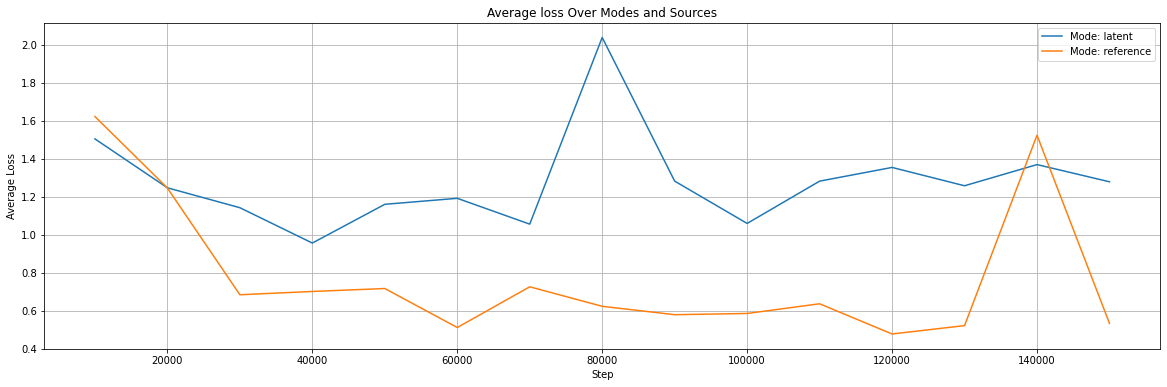

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        # # Find the maximum or minimum value of the metric before step 322000
        # max_before_322000 = mode_data[mode_data['step'] < 322000][metric].max()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
            # step_before_322000 = mode_data[mode_data[metric] == max_before_322000]['step'].values[0]
            # print(f'Max in {mode} mode before finetune: {max_before_322000:.4f} at step {step_before_322000}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

Max: 0.8361 at step 100000


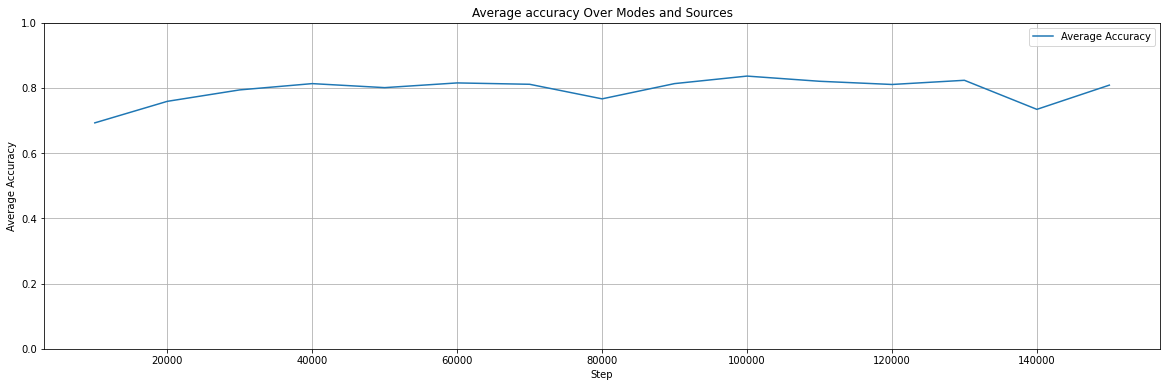

Min: 0.8217 at step 100000


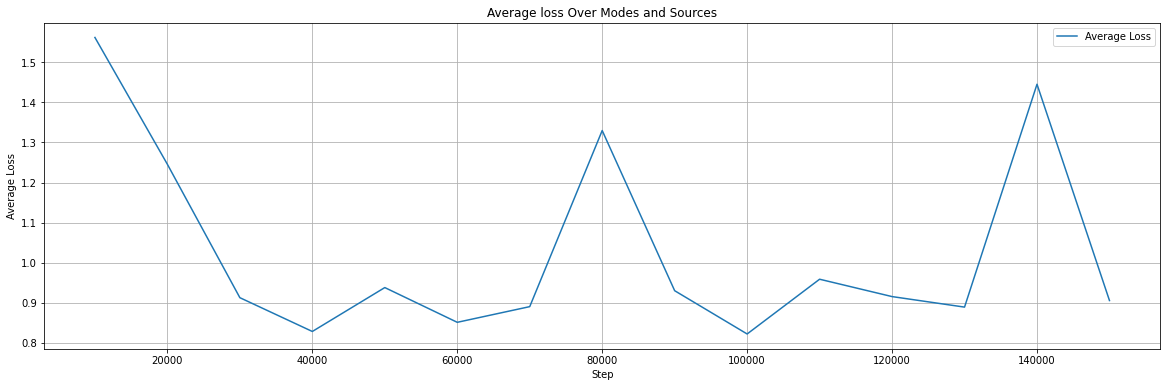

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(mean_data['step'], mean_data[metric], label=f'Average {metric.capitalize()}')
    max_value = mean_data[metric].max()
    min_value = mean_data[metric].min()
    if metric == 'accuracy':
        step = mean_data[mean_data[metric] == max_value]['step'].values[0]
        print(f'Max: {max_value:.4f} at step {step}')
    else:
        step = mean_data[mean_data[metric] == min_value]['step'].values[0]
        print(f'Min: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    # # Plot a vertical line at step 322000
    # plt.axvline(x=322000, color='r', linestyle='--', label='Finetuning Start')
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

## Domain Score

In [19]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,10000,latent,WAL,RUN,0.336957,3.404705
1,10000,latent,WAL,CLD,0.358696,6.057100
2,10000,latent,WAL,CLU,0.363712,4.638000
3,10000,latent,RUN,WAL,0.262523,5.439198
4,10000,latent,RUN,CLD,0.179035,6.060980


Maximum accuracy in latent mode: 0.4831 at step 80000


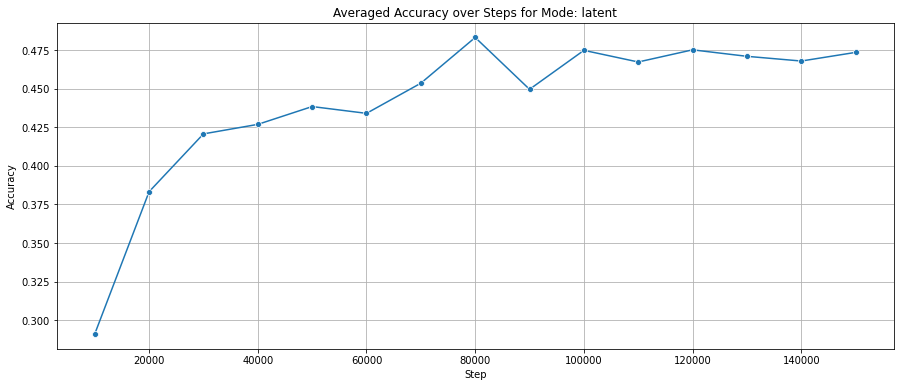

Maximum accuracy in reference mode: 0.3647 at step 70000


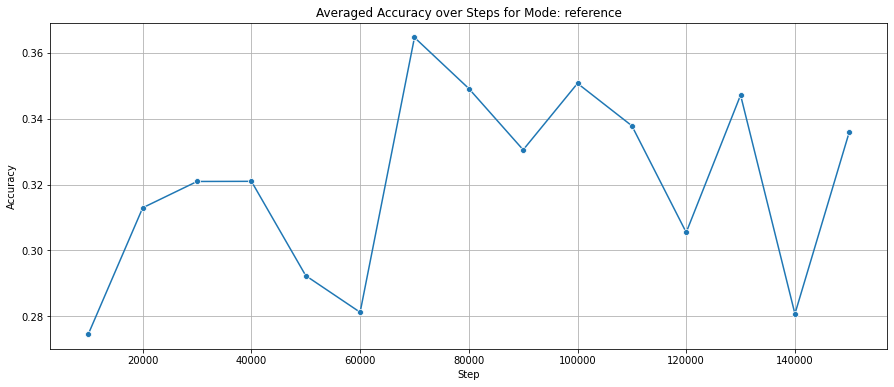

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')

Maximum accuracy in reference mode: 0.4161 at step 80000


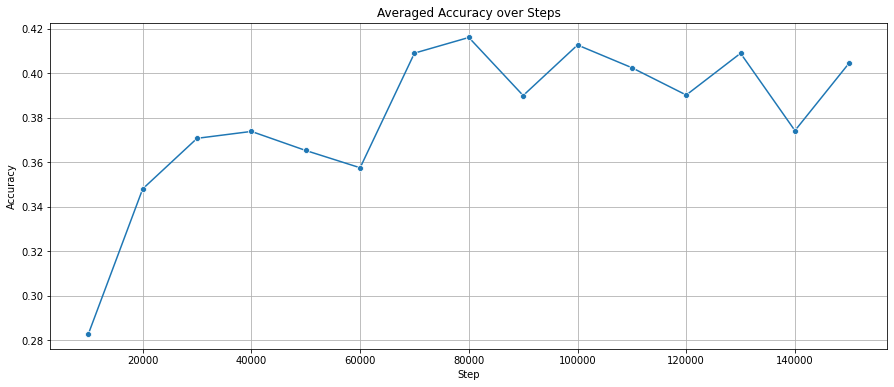

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, metric):
    
    # Group by step and calculate the mean of the metric
    averaged_data = data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



plot_metric_averaged(domain_scores, 'accuracy')

## Distance Score

In [22]:
distance_scores = pd.read_csv('eval/dist_scores.csv')
distance_scores.head()

,step,mode,source,target,domain,distance
0,10000,latent,WAL,RUN,0,1.129225
1,10000,latent,WAL,RUN,1,1.034328
2,10000,latent,WAL,RUN,2,0.176543
3,10000,latent,WAL,RUN,3,1.163814
4,10000,latent,WAL,RUN,4,0.870034


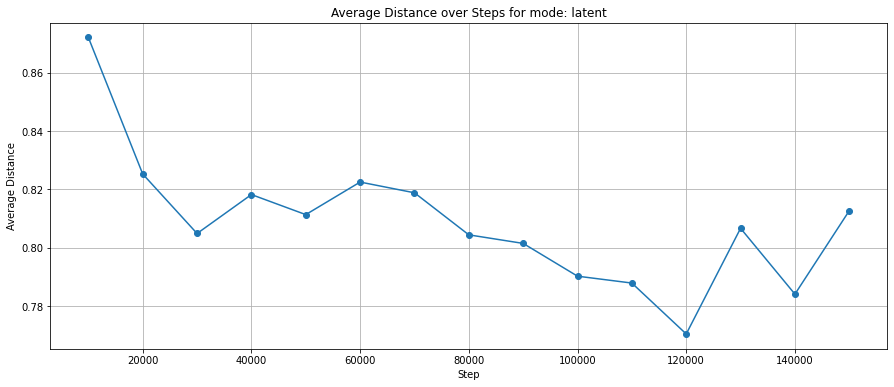

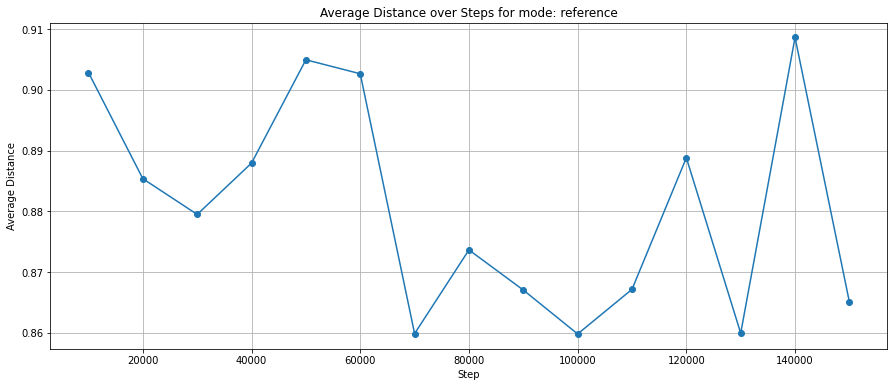

In [23]:
def plot_dist(data, mode):
    # Filter the dataframe by the given mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = filtered_data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps for mode: {mode}')
    plt.grid(True)
    plt.show()

for mode in distance_scores['mode'].unique():
    plot_dist(distance_scores, mode)

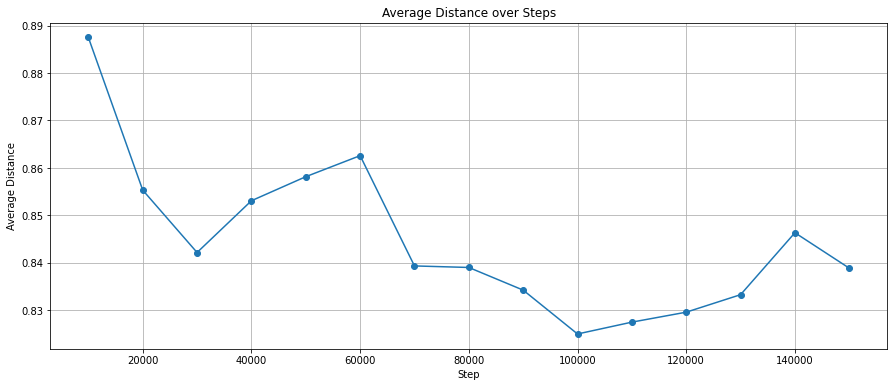

In [24]:
def plot_dist(data):
    
    # Group by 'step' and calculate the mean of 'distance'
    grouped_data = data.groupby('step')['distance'].mean().reset_index()
    
    # Plot the data
    plt.figure(figsize=(15, 6))
    plt.plot(grouped_data['step'], grouped_data['distance'], marker='o')
    plt.xlabel('Step')
    plt.ylabel('Average Distance')
    plt.title(f'Average Distance over Steps')
    plt.grid(True)
    plt.show()

plot_dist(distance_scores)